<a href="https://colab.research.google.com/github/OtavioCarvalho1/Time_Series/blob/main/time_series_SHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação do altoritmo ao estado de referência

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from math import sqrt

**1.1** Importação do sinal utilizado no TREINAMENTO

In [24]:
Names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']

df_train = pd.read_csv("/content/drive/MyDrive/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv", names=Names)
df_train

,Tempo [s],Amplitude PZT Atuador,Amplitude PZT Sensor
0,0.000000e+00,-0.000182,0.000000e+00
1,1.000000e-07,-0.000067,0.000000e+00
2,2.000000e-07,0.000169,0.000000e+00
3,3.000000e-07,-0.000112,0.000000e+00
4,4.000000e-07,-0.000063,1.000000e-08
...,...,...,...
14995,1.499500e-03,-0.000309,-3.881000e-05
14996,1.499600e-03,-0.000339,-2.935000e-05
14997,1.499700e-03,-0.000459,-1.844000e-05
14998,1.499800e-03,-0.000513,-6.140000e-06


**1.2** Importação do sinal utilizado no TESTE

In [25]:
df_test = pd.read_csv("/content/drive/MyDrive/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_2_150KHz__5ciclos_B3_A3.csv", names=Names)

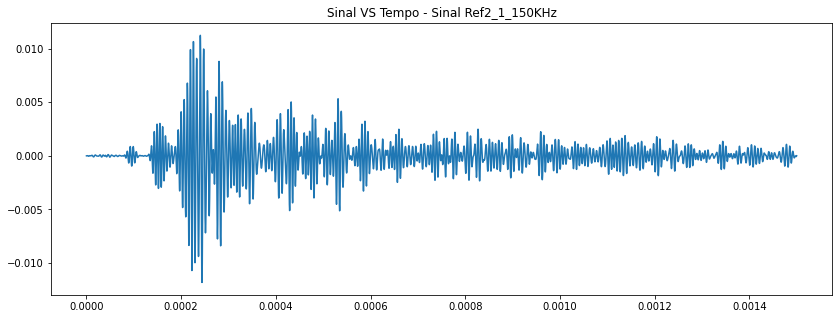

In [26]:
# plot do sinal (sinal do PZT sensor vs tempo)
plt.figure(figsize=(14,5))
plt.plot(df_train['Tempo [s]'], df_train['Amplitude PZT Sensor'])
plt.title('Sinal VS Tempo - Sinal Ref2_1_150KHz')
plt.show()

**2** "Normalização"

OBS: Como discutido, a operação vista no trabalho do autor Wagner Cano parece ser mais um standardization do que normalização. Portanto, nesse caso, faço aqui a "standardização do sinal", a seguir.

<function matplotlib.pyplot.show>

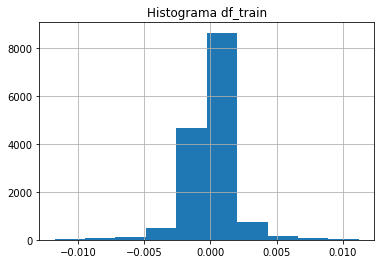

In [27]:
# Plot do histograma de valores do sinal df_train['Amplitude PZT Sensor']
df_train [['Amplitude PZT Sensor']].hist()
plt.title('Histograma df_train')
plt.show

In [30]:
# Standardization do dado de treinamento (df_train)
scaler = StandardScaler()

scaler = scaler.fit(df_train[['Amplitude PZT Sensor']])
print('Média: %f, Desvio Padrão: %f' % (scaler.mean_, sqrt(scaler.var_)))

headers = ['Amplitude PZT Sensor']

df_train_std = pd.DataFrame(scaler.transform(df_train[['Amplitude PZT Sensor']]), columns=headers)
coluna_tempo = df_train['Tempo [s]']
df_train_std = df_train_std.join(coluna_tempo)
df_train_std = df_train_std[['Tempo [s]', 'Amplitude PZT Sensor']] # organiza a ordem das colunas

# df_train após standardization
df_train_std.head(10)


Média: -0.000000, Desvio Padrão: 0.001791


,Tempo [s],Amplitude PZT Sensor
0,0.000000e+00,0.000064
1,1.000000e-07,0.000064
2,2.000000e-07,0.000064
3,3.000000e-07,0.000064
4,4.000000e-07,0.000070
5,5.000000e-07,0.000087
6,6.000000e-07,0.000120
7,7.000000e-07,0.000182
8,8.000000e-07,0.000282
9,9.000000e-07,0.000450


In [ ]:
# Standardization do dado de treinamento (df_test)
scaler = StandardScaler()

scaler = scaler.fit(df_test[['Amplitude PZT Sensor']])
print('Média: %f, Desvio Padrão: %f' % (scaler.mean_, sqrt(scaler.var_)))

headers = ['Amplitude PZT Sensor']

df_test_std = pd.DataFrame(scaler.transform(df_test[['Amplitude PZT Sensor']]), columns=headers)
coluna_tempo = df_test['Tempo [s]']
df_test_std = df_test_std.join(coluna_tempo)
df_test_std = df_test_std[['Tempo [s]', 'Amplitude PZT Sensor']] # organiza a ordem das colunas

# df_test após standardization
df_test_std.head(10)

**3** Isolamento do subframe de análise, entre 200 e 230 microssegundos. 

OBS: Segundo o autor, este é o melhor trecho para se observar as ondas A0, que interagem melhor com o tipo de "dano" na placa do experimento.

In [58]:
df_train_std_A0 = df_train_std.iloc[2000:2300]
df_train_std_A0.head()

,Tempo [s],Amplitude PZT Sensor
2000,0.0002,2.293469
2001,0.0002,2.269810
2002,0.0002,2.223110
2003,0.0002,2.153578
2004,0.0002,2.061643


# Alterando o índice do subset para começar em 0, envitando assim problemas ao aplicar os algoritmos AR e ARX

In [59]:
df_train_std_A0 = pd.DataFrame(df_train_std_A0.reset_index(inplace=True, drop=True), columns=headers)
coluna_tempo = df_train['Tempo [s]']
df_train_std_A0 = df_train_std_A0.join(coluna_tempo)
df_train_std_A0 = df_train_std_A0[['Tempo [s]', 'Amplitude PZT Sensor']]
df_train_std_A0.head()

,Tempo [s],Amplitude PZT Sensor


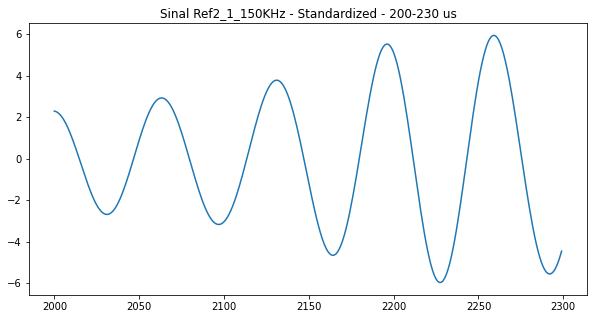

In [39]:
plt.figure(figsize=(10,5))
plt.plot(df_train_std_A0['Amplitude PZT Sensor'])
plt.title('Sinal Ref2_1_150KHz - Standardized - 200-230 us')
plt.show()